# CV Paper : 1. VGGNet

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np

> PyTorch에서 신경망 모델은 nn.Module 을 상속받는 클래스(class)를 생성하여 정의합니다. \
> __init__ 함수에서 신경망의 계층(layer)들을 정의하고, \
> forward 함수에서 신경망에 데이터를 어떻게 전달할지 지정합니다. \
> 가능한 경우 GPU 또는 MPS로 신경망을 이동시켜 연산을 가속(accelerate)합니다.


In [2]:
# 학습에 사용할 CPU나 GPU, MPS 장치를 얻습니다
device = ("cuda" if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
print(f"Using '{device}' device")

Using 'cuda' device


## Architecture

In [3]:
# Conv Layer 2개로 구성된 ConvBlock 구현
class ConvBlock2c(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ConvBlock2c, self).__init__()

        self.in_dim = in_channels
        self.out_dim = out_channels
        self.main = nn.Sequential(nn.Conv2d(self.in_dim, self.out_dim, kernel_size=3, padding=1),
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=2, stride=2)
                                )
    def forward(self, x):
        out = self.main(x)
        return out


# Conv Layer 4개로 구성된 ConvBlock 구현
class ConvBlock4c(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ConvBlock4c, self).__init__()

        self.in_dim = in_channels
        self.out_dim = out_channels
        self.main = nn.Sequential(nn.Conv2d(self.in_dim, self.out_dim, kernel_size=3, padding=1),
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=2, stride=2)
                                )
    def forward(self, x):
        out = self.main(x)
        return out


# VGGNet 모델 정의
class VGGNet(nn.Module):
    def __init__(self, in_channels=3, num_classes=10):
        super(VGGNet, self).__init__()

        self.block1 = ConvBlock2c(in_channels, 64) # 224 -> 112
        self.block2 = ConvBlock2c(64, 128) # 112 -> 56
        self.block3 = ConvBlock4c(128, 256) # 56 -> 28
        self.block4 = ConvBlock4c(256, 512) # 28 -> 14
        self.block5 = ConvBlock4c(512, 512) # 14 -> 7

        self.classifier = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        x = x.view(x.size(0), -1) # 1차원으로 만들기
        x = self.classifier(x)
        return x

# Architecture에 대한 인스턴스 생성
model = VGGNet().to(device)  # rbg 3채널 입력, 10개 클래스 분류 and 

# 모델 구조 출력
print(model)

VGGNet(
  (block1): ConvBlock2c(
    (main): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (block2): ConvBlock2c(
    (main): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padd

In [5]:
from torchinfo import summary

# 모델 정의
# model = ?

# 학습에 사용할 CPU나 GPU, MPS 장치를 얻습니다
device = ("cuda" if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
print(f"Using '{device}' device")

# 모델 요약 정보 출력
summary(model, input_size=(3, 3, 32, 32), device=device)

Using 'cuda' device


Layer (type:depth-idx)                   Output Shape              Param #
VGGNet                                   [3, 10]                   --
├─ConvBlock2c: 1-1                       [3, 64, 16, 16]           --
│    └─Sequential: 2-1                   [3, 64, 16, 16]           --
│    │    └─Conv2d: 3-1                  [3, 64, 32, 32]           1,792
│    │    └─BatchNorm2d: 3-2             [3, 64, 32, 32]           128
│    │    └─ReLU: 3-3                    [3, 64, 32, 32]           --
│    │    └─Conv2d: 3-4                  [3, 64, 32, 32]           36,928
│    │    └─BatchNorm2d: 3-5             [3, 64, 32, 32]           128
│    │    └─ReLU: 3-6                    [3, 64, 32, 32]           --
│    │    └─MaxPool2d: 3-7               [3, 64, 16, 16]           --
├─ConvBlock2c: 1-2                       [3, 128, 8, 8]            --
│    └─Sequential: 2-2                   [3, 128, 8, 8]            --
│    │    └─Conv2d: 3-8                  [3, 128, 16, 16]          73,856
│ 

In [6]:
# 성공적으로 모델이 구축됬는지 확인합니다.
x = torch.randn(2, 3, 32, 32).to(device)
output = model(x)
print(output)

tensor([[ 0.1911, -0.1670,  0.1756,  0.0598,  0.4698,  0.0198, -0.0610,  0.1108,
         -0.2414, -0.0456],
        [ 0.3169, -0.0256, -0.1814,  0.0549,  0.2758,  0.1502,  0.1228,  0.1350,
          0.1396, -0.0043]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [7]:
# VGG19 모델 구현의 검증을 목적으로, 더미 데이터를 만들어서 포워드 연산을 수행해 본다.
vggnet = VGGNet(3, 10)
dummy_x = torch.randn([2,3,32,32])
dummy_pred = vggnet(dummy_x)
print(dummy_pred.shape)

torch.Size([2, 10])


## Hyperparameters

In [8]:
learning_rate = 0.0001
epochs = 10
batch_size = 32

## DataLoad

> ***CIFAR10*** \
> 50,000개의 Train Data와 10,000의 Test Data로 구성. \
> 각 데이터는 10개의 클래스 중 하나에 해당한다. \
> 그리고 각 데이터의 크기는 가로 32, 세로 32의 채널 3으로 이루어져 있다. \
> CIFAR10 데이터셋은 torchvision 라이브러리에 내장.

> 파이토치(PyTorch)에는 데이터 작업을 위한 기본 요소 두가지인 \
> torch.utils.data.DataLoader 와 torch.utils.data.Dataset 가 있습니다. \
> Dataset 은 샘플과 정답(label)을 저장하고, \
> DataLoader 는 Dataset 을 순회 가능한 객체(iterable)로 감쌉니다.

In [9]:
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

cifar10_data = CIFAR10(root='data', train=False, download=True, transform=transforms.ToTensor())
cifar10_classes = ["airplane",
                   "automobile",
                   "bird",
                   "Cat",
                   "deer",
                   "dog",
                   "frog" ,
                   "horse",
                   "Ship",
                   "truck"]

100%|██████████| 170498071/170498071 [00:11<00:00, 14296338.59it/s]


Extracting data/cifar-10-python.tar.gz to data


### Data preview

데이터의 수:  10000


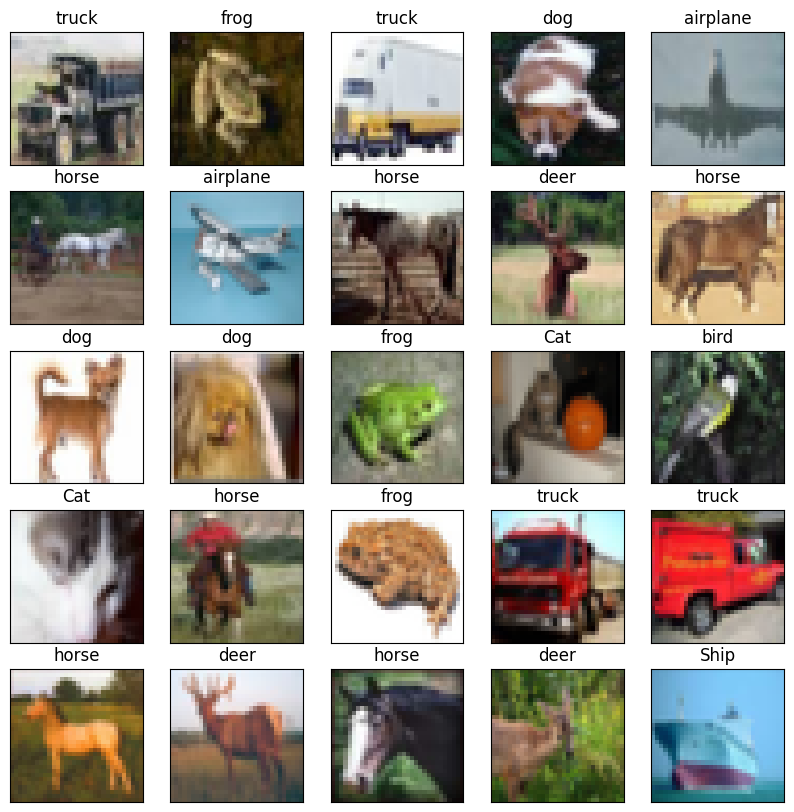

In [10]:
print("데이터의 수: ", len(cifar10_data))

n_image = 25  # 표시하는 이미지의 수
cifar10_loader = DataLoader(cifar10_data, batch_size=n_image, shuffle=True)
dataiter = iter(cifar10_loader)  # iteratior: 요소를 차례대로 꺼낼 수 있게 한다.
images, labels = next(dataiter)  # 처음의 배치를 꺼낸다

plt.figure(figsize=(10, 10))  # 이미지 크기
for i in range(n_image):
    ax = plt.subplot(5, 5, i+1)
    ax.imshow(images[i].permute(1, 2, 0))
    label = cifar10_classes[labels[i]]
    ax.set_title(label)
    ax.get_xaxis().set_visible(False) # 축을 표시하지 않는다
    ax.get_yaxis().set_visible(False)
plt.show()

### Data Augmentation

In [11]:
# None

### Set DataLoader 

In [12]:
# 데이터 불러오기 
train_data = CIFAR10(root="data", train=True, download=True, transform=transforms.ToTensor())   
test_data = CIFAR10(root="data",train=False,download=True,transform=transforms.ToTensor())

# DataLoader 설정
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
print("------------------------------------------")
for X, y in test_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Files already downloaded and verified
Files already downloaded and verified
------------------------------------------
Shape of X [N, C, H, W]: torch.Size([32, 3, 32, 32])
Shape of y: torch.Size([32]) torch.int64


## Optimizer Setting

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Training

### ( Train option 1 )

#### 학습 전 유요한 함수 3가지 선언

In [14]:
# 학습 중간에 accuracy의 값이 어떻게 변하는지를 시각화 해주는 acc_plot 함수를 구현
def acc_plot(acc):
    plt.plot(acc)
    plt.xlabel('log')
    plt.ylabel('accuracy')
    plt.grid(True)
    plt.show()
    return 0

# 학습이 시작한 후 시간이 얼마나 흘렀는지를 확인할 수 있는 Timer 클래스를 구현한다.
import time
import datetime
class Timer():
    def __init__(self):
        self.cur_t = time.time()

    def tic(self):
        self.cur_t = time.time()

    def toc(self):
        return time.time() - self.cur_t

    def tocStr(self, t=-1):
        if (t == -1):
            return str(datetime.timedelta(seconds=np.round(time.time() - self.cur_t, 3)))[:-4]
        else:
            return str(datetime.timedelta(seconds=np.round(t, 3)))[:-4]
        
# 테스트 데이터로 모델의 일반화 성능을 측정하기 위한 함수를 구현한다.
def test_on_cifar10(model, accuracy_list):
    model.eval()  # eval 모드로 변경 (Batch Normalization이 moving mean/var를 사용하도록, dropout을 적용하지 않도록 설정)
    correct = 0
    total = 0
    for j, (images, labels) in enumerate(test_loader):
        images = torch.tensor(images).to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum()
        if (j+1)%100==0:
            break

    print('Test Accuracy of the model on the 100 test images: %d %%' % (100 * correct / total))
    accuracy_list.append(100 * correct / total)
    return accuracy_list

Epoch [1/10], Iter [100/1562] Loss: 1.9692, iter_time: 2.95


/tmp/ipykernel_215035/315268134.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = torch.tensor(images).to(device)


Test Accuracy of the model on the 100 test images: 22 %
Epoch [1/10], Iter [200/1562] Loss: 1.8818, iter_time: 8.35
Test Accuracy of the model on the 100 test images: 23 %
Epoch [1/10], Iter [300/1562] Loss: 1.8410, iter_time: 8.43
Test Accuracy of the model on the 100 test images: 21 %
Epoch [1/10], Iter [400/1562] Loss: 1.8922, iter_time: 8.88
Test Accuracy of the model on the 100 test images: 25 %
Epoch [1/10], Iter [500/1562] Loss: 1.8415, iter_time: 8.23
Test Accuracy of the model on the 100 test images: 32 %
Epoch [1/10], Iter [600/1562] Loss: 1.5669, iter_time: 8.49
Test Accuracy of the model on the 100 test images: 33 %
Epoch [1/10], Iter [700/1562] Loss: 1.7613, iter_time: 8.31
Test Accuracy of the model on the 100 test images: 34 %
Epoch [1/10], Iter [800/1562] Loss: 1.7962, iter_time: 8.31
Test Accuracy of the model on the 100 test images: 34 %
Epoch [1/10], Iter [900/1562] Loss: 2.0981, iter_time: 8.31
Test Accuracy of the model on the 100 test images: 36 %
Epoch [1/10], It

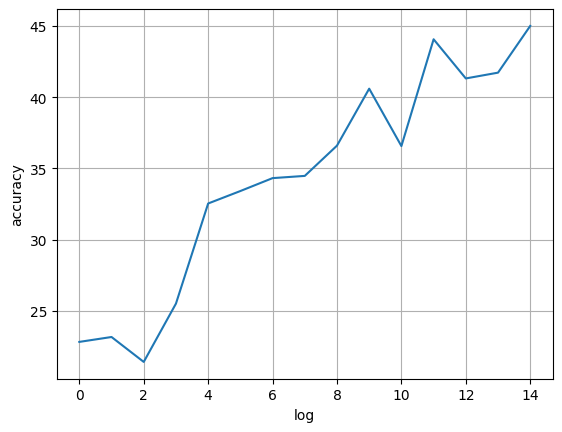

Epoch [2/10], Iter [100/1562] Loss: 1.6305, iter_time: 11.39
Test Accuracy of the model on the 100 test images: 42 %
Epoch [2/10], Iter [200/1562] Loss: 1.7861, iter_time: 8.97
Test Accuracy of the model on the 100 test images: 43 %
Epoch [2/10], Iter [300/1562] Loss: 1.5070, iter_time: 8.74
Test Accuracy of the model on the 100 test images: 42 %
Epoch [2/10], Iter [400/1562] Loss: 1.3728, iter_time: 9.01
Test Accuracy of the model on the 100 test images: 45 %
Epoch [2/10], Iter [500/1562] Loss: 1.5600, iter_time: 9.28
Test Accuracy of the model on the 100 test images: 48 %
Epoch [2/10], Iter [600/1562] Loss: 1.3527, iter_time: 9.10
Test Accuracy of the model on the 100 test images: 48 %
Epoch [2/10], Iter [700/1562] Loss: 1.7864, iter_time: 9.38
Test Accuracy of the model on the 100 test images: 47 %
Epoch [2/10], Iter [800/1562] Loss: 1.0423, iter_time: 8.72
Test Accuracy of the model on the 100 test images: 53 %
Epoch [2/10], Iter [900/1562] Loss: 1.0393, iter_time: 8.67
Test Accura

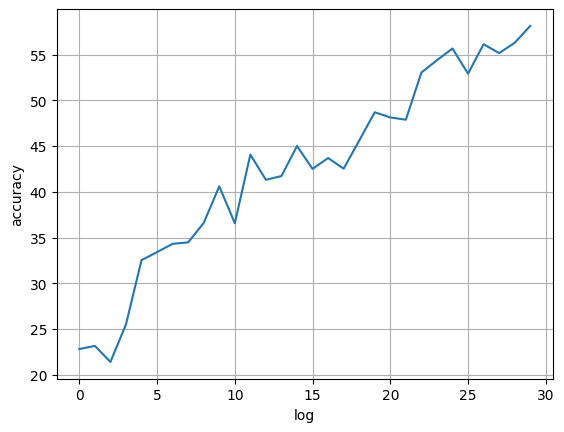

Epoch [3/10], Iter [100/1562] Loss: 1.2942, iter_time: 11.57
Test Accuracy of the model on the 100 test images: 58 %
Epoch [3/10], Iter [200/1562] Loss: 1.2287, iter_time: 8.86
Test Accuracy of the model on the 100 test images: 56 %
Epoch [3/10], Iter [300/1562] Loss: 1.1162, iter_time: 8.99
Test Accuracy of the model on the 100 test images: 58 %
Epoch [3/10], Iter [400/1562] Loss: 1.1503, iter_time: 8.97
Test Accuracy of the model on the 100 test images: 57 %
Epoch [3/10], Iter [500/1562] Loss: 0.9667, iter_time: 9.73
Test Accuracy of the model on the 100 test images: 60 %
Epoch [3/10], Iter [600/1562] Loss: 1.4489, iter_time: 8.70
Test Accuracy of the model on the 100 test images: 61 %
Epoch [3/10], Iter [700/1562] Loss: 0.9074, iter_time: 8.50
Test Accuracy of the model on the 100 test images: 60 %
Epoch [3/10], Iter [800/1562] Loss: 0.9112, iter_time: 8.97
Test Accuracy of the model on the 100 test images: 63 %
Epoch [3/10], Iter [900/1562] Loss: 0.9759, iter_time: 9.32
Test Accura

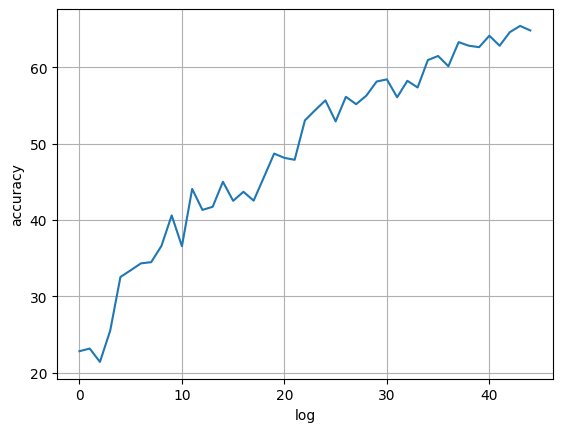

Epoch [4/10], Iter [100/1562] Loss: 1.0160, iter_time: 10.84
Test Accuracy of the model on the 100 test images: 66 %
Epoch [4/10], Iter [200/1562] Loss: 0.9111, iter_time: 8.36
Test Accuracy of the model on the 100 test images: 64 %
Epoch [4/10], Iter [300/1562] Loss: 0.7725, iter_time: 8.97
Test Accuracy of the model on the 100 test images: 63 %
Epoch [4/10], Iter [400/1562] Loss: 0.9115, iter_time: 8.61
Test Accuracy of the model on the 100 test images: 65 %
Epoch [4/10], Iter [500/1562] Loss: 0.9289, iter_time: 9.09
Test Accuracy of the model on the 100 test images: 65 %
Epoch [4/10], Iter [600/1562] Loss: 0.8237, iter_time: 8.41
Test Accuracy of the model on the 100 test images: 67 %
Epoch [4/10], Iter [700/1562] Loss: 0.9301, iter_time: 8.70
Test Accuracy of the model on the 100 test images: 67 %
Epoch [4/10], Iter [800/1562] Loss: 0.8034, iter_time: 8.91
Test Accuracy of the model on the 100 test images: 66 %
Epoch [4/10], Iter [900/1562] Loss: 1.1670, iter_time: 9.18
Test Accura

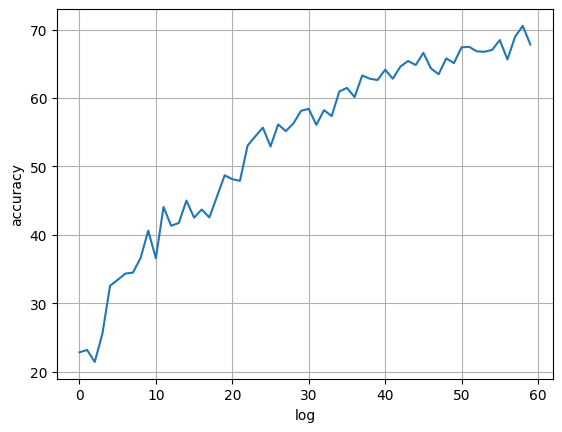

Epoch [5/10], Iter [100/1562] Loss: 0.7849, iter_time: 11.00
Test Accuracy of the model on the 100 test images: 68 %
Epoch [5/10], Iter [200/1562] Loss: 0.7432, iter_time: 9.40
Test Accuracy of the model on the 100 test images: 67 %
Epoch [5/10], Iter [300/1562] Loss: 0.7435, iter_time: 9.20
Test Accuracy of the model on the 100 test images: 69 %
Epoch [5/10], Iter [400/1562] Loss: 1.0175, iter_time: 9.02
Test Accuracy of the model on the 100 test images: 67 %
Epoch [5/10], Iter [500/1562] Loss: 0.7461, iter_time: 8.88
Test Accuracy of the model on the 100 test images: 69 %
Epoch [5/10], Iter [600/1562] Loss: 0.6219, iter_time: 9.01
Test Accuracy of the model on the 100 test images: 70 %
Epoch [5/10], Iter [700/1562] Loss: 0.5762, iter_time: 8.87
Test Accuracy of the model on the 100 test images: 71 %
Epoch [5/10], Iter [800/1562] Loss: 0.8798, iter_time: 8.52
Test Accuracy of the model on the 100 test images: 70 %
Epoch [5/10], Iter [900/1562] Loss: 0.9333, iter_time: 8.81
Test Accura

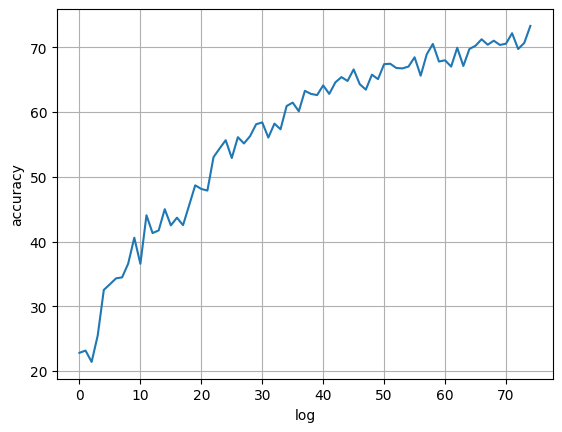

Epoch [6/10], Iter [100/1562] Loss: 0.7894, iter_time: 10.94
Test Accuracy of the model on the 100 test images: 73 %
Epoch [6/10], Iter [200/1562] Loss: 0.7757, iter_time: 8.96
Test Accuracy of the model on the 100 test images: 68 %
Epoch [6/10], Iter [300/1562] Loss: 0.4991, iter_time: 10.60
Test Accuracy of the model on the 100 test images: 71 %
Epoch [6/10], Iter [400/1562] Loss: 0.7767, iter_time: 9.32
Test Accuracy of the model on the 100 test images: 70 %
Epoch [6/10], Iter [500/1562] Loss: 0.9189, iter_time: 10.43
Test Accuracy of the model on the 100 test images: 72 %
Epoch [6/10], Iter [600/1562] Loss: 0.7552, iter_time: 8.86
Test Accuracy of the model on the 100 test images: 72 %
Epoch [6/10], Iter [700/1562] Loss: 0.4875, iter_time: 8.57
Test Accuracy of the model on the 100 test images: 74 %
Epoch [6/10], Iter [800/1562] Loss: 0.8399, iter_time: 8.93
Test Accuracy of the model on the 100 test images: 72 %
Epoch [6/10], Iter [900/1562] Loss: 0.5165, iter_time: 9.12
Test Accu

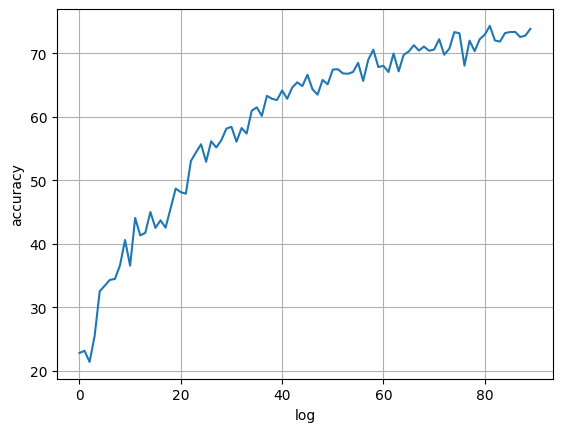

Epoch [7/10], Iter [100/1562] Loss: 1.0227, iter_time: 11.36
Test Accuracy of the model on the 100 test images: 72 %
Epoch [7/10], Iter [200/1562] Loss: 0.8746, iter_time: 9.10
Test Accuracy of the model on the 100 test images: 73 %
Epoch [7/10], Iter [300/1562] Loss: 0.5657, iter_time: 9.59
Test Accuracy of the model on the 100 test images: 72 %
Epoch [7/10], Iter [400/1562] Loss: 0.7298, iter_time: 9.21
Test Accuracy of the model on the 100 test images: 72 %
Epoch [7/10], Iter [500/1562] Loss: 0.5362, iter_time: 9.46
Test Accuracy of the model on the 100 test images: 74 %
Epoch [7/10], Iter [600/1562] Loss: 0.4795, iter_time: 8.92
Test Accuracy of the model on the 100 test images: 73 %
Epoch [7/10], Iter [700/1562] Loss: 0.6260, iter_time: 9.23
Test Accuracy of the model on the 100 test images: 75 %
Epoch [7/10], Iter [800/1562] Loss: 1.1231, iter_time: 9.29
Test Accuracy of the model on the 100 test images: 73 %
Epoch [7/10], Iter [900/1562] Loss: 0.5420, iter_time: 9.29
Test Accura

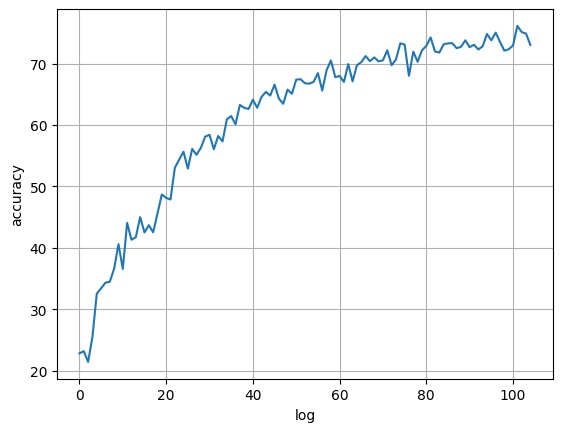

Epoch [8/10], Iter [100/1562] Loss: 0.4722, iter_time: 11.27
Test Accuracy of the model on the 100 test images: 74 %
Epoch [8/10], Iter [200/1562] Loss: 0.7280, iter_time: 8.94
Test Accuracy of the model on the 100 test images: 74 %
Epoch [8/10], Iter [300/1562] Loss: 0.5515, iter_time: 9.12
Test Accuracy of the model on the 100 test images: 73 %
Epoch [8/10], Iter [400/1562] Loss: 0.3614, iter_time: 9.78
Test Accuracy of the model on the 100 test images: 74 %
Epoch [8/10], Iter [500/1562] Loss: 0.6215, iter_time: 9.09
Test Accuracy of the model on the 100 test images: 76 %
Epoch [8/10], Iter [600/1562] Loss: 0.8404, iter_time: 8.90
Test Accuracy of the model on the 100 test images: 75 %
Epoch [8/10], Iter [700/1562] Loss: 0.3694, iter_time: 8.92
Test Accuracy of the model on the 100 test images: 75 %
Epoch [8/10], Iter [800/1562] Loss: 0.6236, iter_time: 9.30
Test Accuracy of the model on the 100 test images: 74 %
Epoch [8/10], Iter [900/1562] Loss: 0.6698, iter_time: 9.87
Test Accura

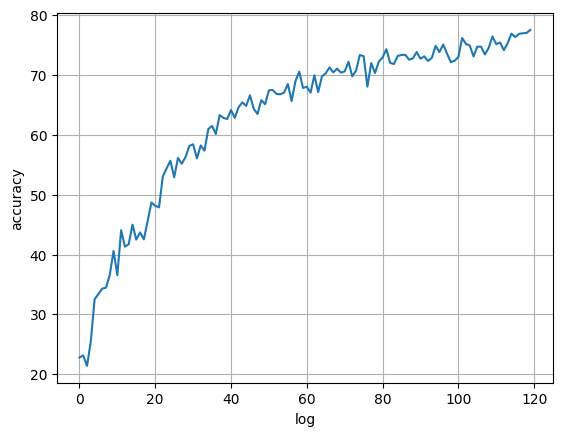

Epoch [9/10], Iter [100/1562] Loss: 0.4332, iter_time: 10.78
Test Accuracy of the model on the 100 test images: 77 %
Epoch [9/10], Iter [200/1562] Loss: 0.5328, iter_time: 9.75
Test Accuracy of the model on the 100 test images: 74 %
Epoch [9/10], Iter [300/1562] Loss: 0.4785, iter_time: 9.28
Test Accuracy of the model on the 100 test images: 76 %
Epoch [9/10], Iter [400/1562] Loss: 0.5272, iter_time: 9.01
Test Accuracy of the model on the 100 test images: 74 %
Epoch [9/10], Iter [500/1562] Loss: 0.4695, iter_time: 8.76
Test Accuracy of the model on the 100 test images: 75 %
Epoch [9/10], Iter [600/1562] Loss: 0.7669, iter_time: 8.81
Test Accuracy of the model on the 100 test images: 75 %
Epoch [9/10], Iter [700/1562] Loss: 0.4069, iter_time: 8.90
Test Accuracy of the model on the 100 test images: 77 %
Epoch [9/10], Iter [800/1562] Loss: 0.3716, iter_time: 9.35
Test Accuracy of the model on the 100 test images: 74 %
Epoch [9/10], Iter [900/1562] Loss: 0.3431, iter_time: 8.98
Test Accura

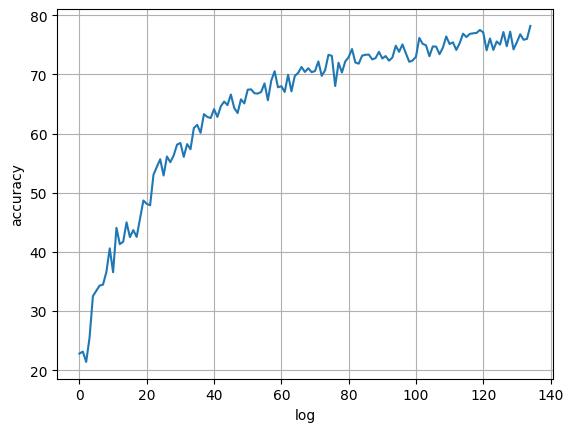

Epoch [10/10], Iter [100/1562] Loss: 0.5345, iter_time: 11.07
Test Accuracy of the model on the 100 test images: 76 %
Epoch [10/10], Iter [200/1562] Loss: 0.4050, iter_time: 9.74
Test Accuracy of the model on the 100 test images: 76 %
Epoch [10/10], Iter [300/1562] Loss: 0.5888, iter_time: 9.20
Test Accuracy of the model on the 100 test images: 76 %
Epoch [10/10], Iter [400/1562] Loss: 0.7778, iter_time: 9.50
Test Accuracy of the model on the 100 test images: 77 %
Epoch [10/10], Iter [500/1562] Loss: 0.6715, iter_time: 9.48
Test Accuracy of the model on the 100 test images: 76 %
Epoch [10/10], Iter [600/1562] Loss: 0.8418, iter_time: 9.89
Test Accuracy of the model on the 100 test images: 77 %
Epoch [10/10], Iter [700/1562] Loss: 0.3905, iter_time: 9.83
Test Accuracy of the model on the 100 test images: 77 %
Epoch [10/10], Iter [800/1562] Loss: 0.3870, iter_time: 9.66
Test Accuracy of the model on the 100 test images: 76 %
Epoch [10/10], Iter [900/1562] Loss: 0.4232, iter_time: 10.04
T

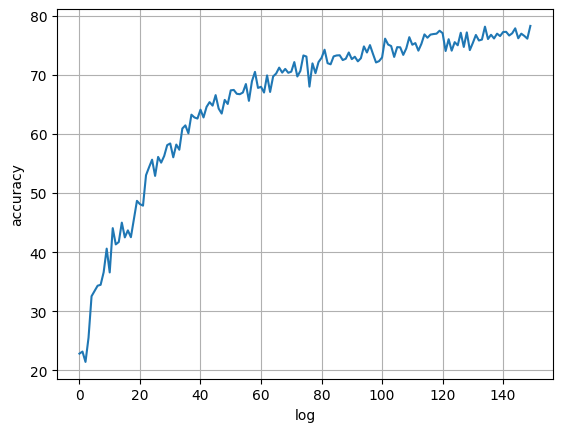

In [15]:
tell_time = Timer()
iter_time = 0

accuracy_list = []
for epoch in range(epochs):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f, iter_time: %2.2f'
                 %(epoch+1, epochs, i+1, len(train_data)//batch_size, loss.item(), tell_time.toc()-iter_time))
            iter_time = tell_time.toc()
            accuracy_list = test_on_cifar10(model, accuracy_list)

    acc_plot(accuracy_list)

### ( Train option 2 )

In [13]:
record_loss_train = []
record_loss_test = []

# Training 학습
for epoch in range(epochs): 
    model.train()
    loss_train = 0
    for j, (X, y) in enumerate(train_loader):
        X, y = X.cuda(), y.cuda()
        pred = model(X)
        loss = criterion(pred, y)
        loss_train += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_train /= j + 1
    record_loss_train.append(loss_train)

    model.eval() # Mode of Evaluation
    loss_test = 0
    for j, (X, y) in enumerate(test_loader): # mini_batch(X, y)를 꺼낸다.
        X, y = X.cuda(), y.cuda()
        pred = model(X)
        loss = criterion(pred, y)
        loss_test += loss.item()
    loss_test /= j + 1
    record_loss_test.append(loss_test)

    if epoch%1 == 0:
        print("Epoch:", epoch+1,
              "\n",
              "Loss_train:", loss_train,
              "\n",
              "loss_test:", loss_test,)

print("------------------------------------\n",
      "---------- Training Done  ----------")

Epoch: 1 
 Loss_train: 1.3614852514620859 
 loss_test: 1.248269417796272
Epoch: 2 
 Loss_train: 1.0412088224732259 
 loss_test: 0.8716774140112697
Epoch: 3 
 Loss_train: 0.8498452387592843 
 loss_test: 0.8760745708173076
Epoch: 4 
 Loss_train: 0.7080768870472222 
 loss_test: 0.6828967279519517
Epoch: 5 
 Loss_train: 0.6035859513782341 
 loss_test: 0.7184820317279417
Epoch: 6 
 Loss_train: 0.5227825981174534 
 loss_test: 0.7275479600642817
Epoch: 7 
 Loss_train: 0.45258963325907614 
 loss_test: 0.5748758074193717
Epoch: 8 
 Loss_train: 0.38598796667594293 
 loss_test: 0.583255914286874
Epoch: 9 
 Loss_train: 0.3317267184520542 
 loss_test: 0.5750852483815659
Epoch: 10 
 Loss_train: 0.29325811261393403 
 loss_test: 0.5502252712750587
------------------------------------
 ---------- Training Done  ----------


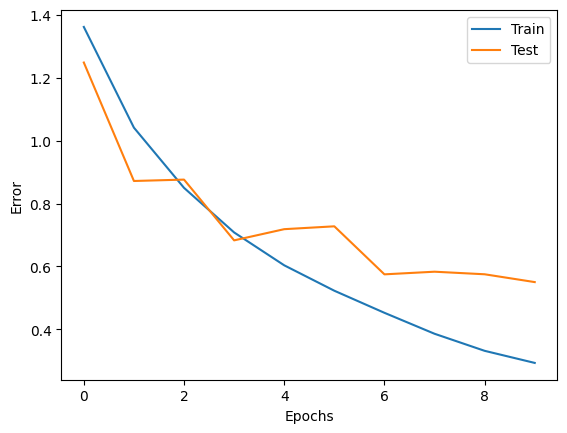

In [14]:
# 오차 추이
plt.plot(range(len(record_loss_train)), record_loss_train,label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

### ( Train option 3 )

In [13]:
# 각 학습단계(training loop)에서 모델은(배치 batch로 제공되는) 학습데이터셋에 대한 예측을 수행,
# 예측 오류를 역전파하여 모델의 매개변수를 조정합니다.
record_loss_train = []
record_loss_test = []

def train(dataloader, model, criterion, optimizer):
    size = len(dataloader.dataset)
    loss_t = 0  # 추가
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = criterion(pred, y)

        loss_t += loss.item()  # 추가

        # BackPropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X) 
            print(f"loss {loss:>7f} [{current:>5d}/{size:>5d}]")
    
    loss_t /= batch + 1  # 추가
    record_loss_train.append(loss_t) # 추가


# 모델이 학습하고 있는지를 확인하기 위해 테스트 데이터셋으로 모델의 성능을 확인합니다.
def test(dataloader, model, criterion):
    test_loss = 0  # 추가
    size = len(dataloader.dataset)
    num_batchs = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += criterion(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        record_loss_test.append(test_loss)
    
    test_loss /= num_batchs
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>1f}%, Avg loss: {test_loss:>8f} \n")

In [14]:
for i in range(epochs):
    print(f"Epoch {i+1}\n------------------------------------------")
    
    train(train_loader, model, criterion, optimizer)
    test(test_loader, model, criterion)

print("------------------------- \n"
      "----- Training Done -----")

Epoch 1
------------------------------------------
loss 1.347759 [   32/50000]
loss 1.347957 [ 3232/50000]
loss 1.461575 [ 6432/50000]
loss 1.447551 [ 9632/50000]
loss 1.271974 [12832/50000]
loss 1.259734 [16032/50000]
loss 1.115443 [19232/50000]
loss 1.040639 [22432/50000]
loss 1.053910 [25632/50000]
loss 1.140719 [28832/50000]
loss 1.110613 [32032/50000]
loss 1.121090 [35232/50000]
loss 0.944148 [38432/50000]
loss 0.896271 [41632/50000]
loss 0.909274 [44832/50000]
loss 1.119945 [48032/50000]
Test Error: 
 Accuracy: 66.580000%, Avg loss: 1.023450 

Epoch 2
------------------------------------------
loss 1.336707 [   32/50000]
loss 0.687156 [ 3232/50000]
loss 0.571226 [ 6432/50000]
loss 0.951790 [ 9632/50000]
loss 0.932904 [12832/50000]
loss 0.905607 [16032/50000]
loss 1.020368 [19232/50000]
loss 0.844810 [22432/50000]
loss 0.987279 [25632/50000]
loss 0.900517 [28832/50000]
loss 0.818303 [32032/50000]
loss 0.787220 [35232/50000]
loss 0.921238 [38432/50000]
loss 1.157978 [41632/50000]
l

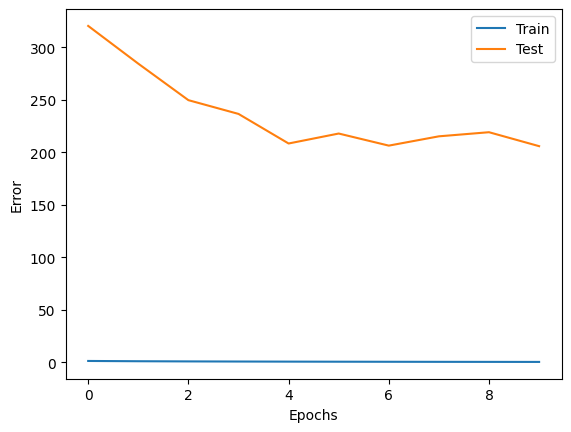

In [15]:
# 오차 추이
plt.plot(range(len(record_loss_train)), record_loss_train,label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

### ( Train option 4 )

In [ ]:
from tqdm import tqdm

# 학습 루프
for epoch in range(epochs):
    model.train()
    # tqdm을 사용하여 학습 진행 상태를 표시합니다.
    with tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch + 1}/{epochs}", unit='batch') as tepoch:
        for i, (images, labels) in tepoch:
            # 이미지를 3채널로 변환 및 전처리
            images = torch.stack([transform(image.squeeze(0)) for image in images])
            images, labels = images.to(device), labels.to(device)

            # 순전파 및 손실 계산
            outputs = model(images)
            loss = criterion(outputs, labels)

            # 역전파 및 최적화
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # 진행 바 업데이트
            tepoch.set_postfix(loss=loss.item())

# 평가 루프
model.eval()
correct = 0
total = 0

# 평가 진행 상태를 표시합니다.
with torch.no_grad(), tqdm(enumerate(test_loader), total=len(test_loader), desc="Evaluating", unit='batch') as ttest:
    for i, (images, labels) in ttest:
        images = torch.stack([transform(image.squeeze(0)) for image in images])
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')



### Accuracy 정답률

In [16]:
# 정답률
correct = 0
total = 0
model.eval()  # eval mode
for j, (X, y) in enumerate(test_loader):
    X, y = X.cuda(), y.cuda()
    pred = model(X)
    correct += (pred.argmax(1) == y).sum().item()
    total += len(X)

print(f"정답률: {correct/total*100}%   __by {epochs} epochs")

정답률: 83.78999999999999%   __by 10 epochs
